<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Основные-метрики" data-toc-modified-id="Основные-метрики-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Основные метрики</a></span></li><li><span><a href="#Длительность-экспонирования" data-toc-modified-id="Длительность-экспонирования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Длительность экспонирования</a></span></li><li><span><a href="#Факторы-стоимости" data-toc-modified-id="Факторы-стоимости-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы стоимости</a></span></li><li><span><a href="#Топ-10-по-предложению" data-toc-modified-id="Топ-10-по-предложению-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Топ-10 по предложению</a></span></li><li><span><a href="#Анализ-недвижимости-в-центре" data-toc-modified-id="Анализ-недвижимости-в-центре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ недвижимости в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.sample(n=3, random_state = 43)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12953,12,10000000.0,80.0,2018-02-01T00:00:00,3,3.0,6.0,54.0,3,NaN,...,7.0,1.0,Санкт-Петербург,26812.0,5510.0,3.0,502.0,0.0,NaN,NaN
3984,18,3850000.0,35.5,2017-06-21T00:00:00,1,NaN,22.0,17.6,1,NaN,...,9.0,2.0,Санкт-Петербург,26078.0,10251.0,1.0,387.0,0.0,NaN,152.0
17416,3,9860000.0,89.3,2016-07-08T00:00:00,3,NaN,11.0,49.7,9,NaN,...,12.4,NaN,Санкт-Петербург,30894.0,4087.0,1.0,696.0,1.0,223.0,858.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Таблица содержит информацию о 23699 объектах недвижимости по 22 метрикам. Имеются пропуски значений, необходима предобработка.

## Предобработка данных

In [6]:
data.duplicated().sum()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Дубликатов в данных нет, пройдемся по столбцам с пропущенным значениям:
1. высота потолков (ceiling_height) - пропусков очень много, почти 40%, однако это не самая важная характеристика недвижимости, оставляем как есть;
2. количество этажей в доме (floors_total) - пропусков мало, но обосновать правило их заполнения проблематично, оставляем так;
3. жилая площадь (living_area) - самая важная характеристика для жилой недвижимости, пропусков немного, примерно 8%, удаляем;
4. площадь кухни (kitchen_area) - тоже важная характеристика, но пропуски могут содержаться в объявлениях студий и совместно с пропусками жилой площади, надо разбираться;
5. балкон (balcony) - пропуски в большинстве случаев должны означать отсутствие, смело заменим на ноль;
6. расположение (locality_name) - очень важная характеристика. Пропусков  мало, удаляем.

Параметр is_apartment приведем к булеву типу, заменив пропуски на False (предложение апартаментов гораздо меньше, чем обычной жилой недвижимости и, скорее всего, NaN соответствует последнему типу жилья). Время переведем в формат времени. Остальные пропуски пока не трогаем. 

In [7]:
data = data.dropna(subset=['living_area'])
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
data['kitchen_area'].isna().sum()
data = data.dropna(subset=['kitchen_area'])

После поиска пропусков параметра "kitchen_area" в объявлениях студий осталось 670 объявлений. К сожалению, их тоже пришлось удалить. Площадь кухни - слишком важный параметр. 
Возможно в данных были объявления комнат. Питер - самый красивый город, но при этом его центр - это царство "коммуналок".

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [9]:
data[data['locality_name'].isna()]['last_price'].describe()

count    3.900000e+01
mean     6.673978e+06
std      4.557874e+06
min      1.750000e+06
25%      4.225000e+06
50%      5.100000e+06
75%      7.400000e+06
max      2.400000e+07
Name: last_price, dtype: float64

Данные по стоимости недвижимости с пропущенной локацией выглядят корректно, однако таких объектов всего 44, можно удалить.

In [10]:
data = data.dropna(subset=['locality_name'])

In [11]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data['is_apartment'].value_counts()


False    21049
True        33
Name: is_apartment, dtype: int64

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')

Приведем время экспонирования объявления к целочисленному формату.

In [13]:
correct_exposition_rows = data.query('~days_exposition.isnull()').index
data.loc[correct_exposition_rows, 'days_exposition'] = data.loc[correct_exposition_rows, 'days_exposition'].astype('int')

In [14]:
data['days_exposition'].head(20)

0       NaN
1      81.0
2     558.0
4     121.0
5      55.0
6     155.0
8     189.0
9     289.0
10    137.0
11      7.0
12     90.0
13    366.0
14    203.0
15     19.0
16    397.0
17    571.0
18    168.0
19     97.0
20     74.0
21    310.0
Name: days_exposition, dtype: float64

### Вывод

Мы подготовили данные для дальнейшего анализа. Избавились от объектов без указания локации, жилой площади и площади кухни (последние два параметра во многих случаях отсутствовали совместно). Доля удаленных строк не превышает 10%. 
Далее заполнили пропуски. Для балконов - нулями. В булевом параметре "is_apartment" пропущенные значения заполнили значением False, поскольку, скорее всего, для квартир эту метрику не заполняли. 

В данных по-прежнему много пропусков. В частности, мы не трогали высоту потолков, количество этажей в доме,  удаленность от центра и аэропорта, поскольку в этих случаях сложно найти объяснение для заполнения пустых значений и есть риск "зашумить" информацию. 

## Расчёты и добавление результатов в таблицу

Добавим в датафрейм столбцы:
1. цена квадратного метра;
2. день недели, месяц и год публикации;
3. этаж (по типу - первый, последний, другой);
4. отношение жилой площади к общей;
5. отношение площади кухни к общей.

In [15]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'].describe()
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday
data['living_share'] = data['living_area'] / data['total_area']
data['kitchen_share'] = data['kitchen_area'] / data['total_area']
data.head()
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)
data['floor_type'].value_counts()

другой       15516
последний     2995
первый        2571
Name: floor_type, dtype: int64

### Вывод
Распределение квартир по этажам выглядит правдоподобно, хотя в группу "другой" могли попасть квартиры на последнем этаже в тех случаях, когда были пропущены значения высотности дома.

Перейдем к исследованию данных.

## Исследовательский анализ данных

### Основные метрики
Изучим последовательно следующие метрики: площадь, цена, число комнат, высота потолков.

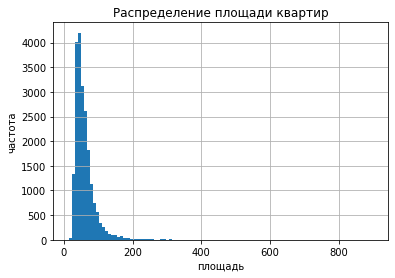

In [16]:
plt.xlabel("площадь")
plt.ylabel('частота')
plt.title('Распределение площади квартир')
data['total_area'].hist(bins=100)


In [17]:
data['total_area'].describe()

count    21082.000000
mean        60.317433
std         34.505588
min         14.000000
25%         40.100000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [18]:
len(data[data['total_area'] > 250])

89

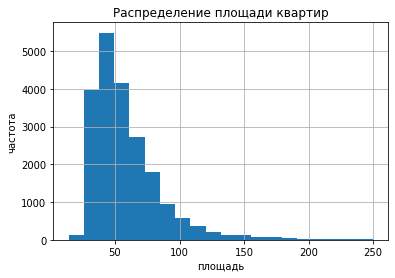

In [19]:
data = data.query('total_area < 250')
plt.xlabel("площадь")
plt.ylabel('частота')
plt.title('Распределение площади квартир')
data['total_area'].hist(bins=20)
plt.show()

Квартир площадью больше 250 $м^{2}$ всего 89. Исключим их из анализа, все-таки это слишком эксклюзивные предложения для жилой недвижимости, хотя в старом фонде квартиры площадью около 200 $м^{2}$ не редкость. 
Наиболее распространены квартиры площадью около 50 $м^{2}$.
Теперь рассмотрим цену.

count    2.098900e+04
mean     6.197035e+06
std      7.014136e+06
min      1.219000e+04
25%      3.490000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

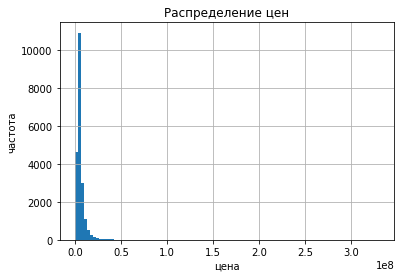

In [20]:
plt.xlabel("цена")
plt.ylabel('частота')
plt.title('Распределение цен')
data['last_price'].hist(bins=100)
data['last_price'].describe()


Очевидно, в стоимости жилья тоже присутствуют аномальные значения правее 4x$10^{7}$ ден. ед. Их следует удалить, поскольку суперэлитная недвижимость это отдельный сегмент рынка. Кроме того, для лучшего восприятия информации избавимся от 3 порядков, поделив цену на 1000.

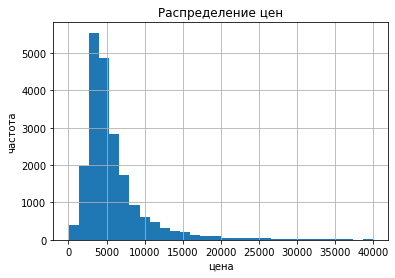

In [21]:
len(data[data['last_price'] > 40000000])
data = data.query('last_price < 40000000')
data['last_price'] /= 1000
plt.xlabel("цена")
plt.ylabel('частота')
plt.title('Распределение цен')
data['last_price'].hist(bins=30)

Так гораздо лучше, перейдем к числу комнат.

In [22]:
data['rooms'].value_counts()

2     7099
1     7079
3     5206
4     1015
5      234
0      128
6       70
7       32
8        6
11       2
14       1
10       1
9        1
Name: rooms, dtype: int64

В данных 128 объявлений с нулем комнат. Проверим, все ли они относятся к студиям. Также удалим предложения начиная с 9 комнатных квартир, поскольку их очень мало и они не оказывают существенного влияния на рынок.

In [23]:
len(data.query('studio == True and rooms == 0'))

128

In [24]:
data.query('studio == True and rooms != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,living_share,kitchen_share,floor_type
2389,5,2250.0,25.41,2016-06-07,1,NaN,12.0,17.08,8,False,...,2.0,485.0,26.0,88547.815821,2016,6,1,0.672176,0.0,другой
3187,13,3800.0,27.00,2016-05-17,1,NaN,14.0,18.00,8,False,...,0.0,NaN,45.0,140740.740741,2016,5,1,0.666667,0.0,другой
4180,4,4500.0,34.00,2016-04-25,1,2.8,10.0,21.00,10,False,...,1.0,433.0,62.0,132352.941176,2016,4,0,0.617647,0.0,последний
8683,10,3500.0,32.50,2016-05-05,1,3.0,23.0,29.90,11,False,...,1.0,564.0,45.0,107692.307692,2016,5,3,0.920000,0.0,другой
11026,1,2800.0,28.00,2016-05-04,1,NaN,26.0,19.00,6,False,...,0.0,NaN,45.0,100000.000000,2016,5,2,0.678571,0.0,другой
12935,10,2200.0,31.00,2016-05-15,1,2.5,8.0,22.30,5,False,...,NaN,NaN,44.0,70967.741935,2016,5,6,0.719355,0.0,другой
15142,2,2700.0,30.00,2016-05-10,1,NaN,21.0,26.00,6,False,...,NaN,NaN,55.0,90000.000000,2016,5,1,0.866667,0.0,другой
18732,4,2400.0,22.00,2016-05-06,1,NaN,10.0,15.00,6,False,...,NaN,NaN,45.0,109090.909091,2016,5,4,0.681818,0.0,другой
20086,0,1550.0,22.00,2016-05-11,1,2.7,15.0,10.94,14,False,...,NaN,NaN,45.0,70454.545455,2016,5,2,0.497273,0.0,другой
21702,9,2349.0,23.40,2016-05-19,1,2.7,20.0,16.00,8,False,...,NaN,NaN,34.0,100384.615385,2016,5,3,0.683761,0.0,другой


Нет, 11 объявлений указывают одну комнату в студии. Исправим на ноль.

<div class="alert alert-block alert-success">
<b>Success:</b> Хорошо!

In [25]:
data.loc[(data['studio']==True) & (data['rooms']!=0), 'rooms'] = 0

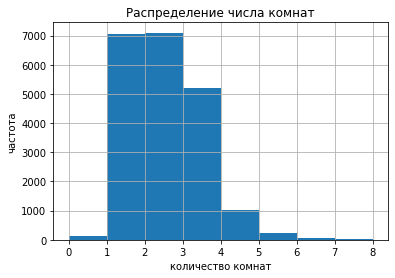

In [26]:
data = data.query('rooms < 9')
plt.xlabel("количество комнат")
plt.ylabel('частота')
plt.title('Распределение числа комнат')
data['rooms'].hist(bins=8)

Гистограмма показывает, что самые частые объявления относятся к однушкам и двушкам. Неожиданно мало предложений студий. 

Перейдем к высоте потолков. В этой метрике было очень много пропусков. Поскольку нет никаких идей по их заполнению, рассмотрим распределение высоты потолков только в  тех объявлениях, где этот параметр указан.

In [27]:
data['ceiling_height'].describe()
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,year,month,weekday,living_share,kitchen_share,floor_type
3148,14,2900.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,NaN,NaN,38666.666667,2018,11,0,0.706667,0.106667,другой
4643,0,4300.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,1.0,331.0,181.0,95555.555556,2018,2,3,0.666667,0.155556,другой
5076,0,3850.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,1.0,578.0,7.0,126229.508197,2018,10,2,0.639344,0.180328,первый
5246,0,2500.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,NaN,540.0,46296.296296,2017,10,4,0.555556,0.166667,другой
5669,4,4400.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,0.0,NaN,267.0,88000.000000,2017,8,1,0.426000,0.140000,другой
5807,17,8150.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,3.0,80.0,38.0,101875.000000,2019,1,2,0.512500,0.150000,другой
6246,6,3300.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,2.0,73.0,NaN,74324.324324,2019,3,0,0.704955,0.128378,последний
9379,5,3950.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,0.0,NaN,NaN,94047.619048,2017,3,6,0.714286,0.123810,другой
10773,8,3800.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,NaN,NaN,71.0,65517.241379,2017,10,4,0.518966,0.139655,другой
11285,0,1950.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,NaN,NaN,18.0,52702.702703,2019,3,2,0.459459,0.243243,другой


В жилье с потолками больше 20 м цены явно укладываются в норму. При этом их площадь тоже показывает, что речь не о дворцах на набережной Фонтанки или каких-то эксклюзивных предложениях. Если поделить высоту на 10, данные придут в норму. Так и сделаем.

In [28]:
wrong_ceilings = data.query('ceiling_height > 20').index
data.loc[wrong_ceilings, 'ceiling_height'] /= 10

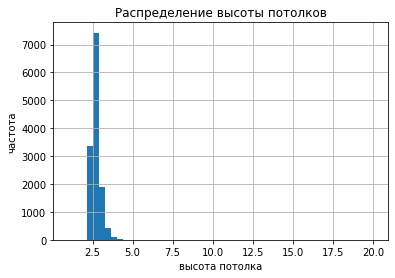

In [29]:
plt.xlabel("высота потолка")
plt.ylabel('частота')
plt.title('Распределение высоты потолков')
data['ceiling_height'].hist(bins=50)

Посмотрим на распределение с высотой не более 5 м.

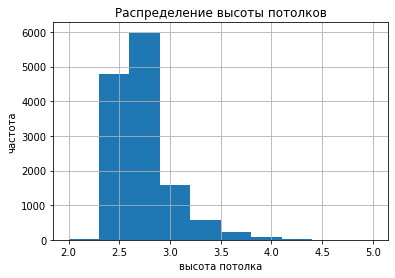

In [30]:
plt.xlabel("высота потолка")
plt.ylabel('частота')
plt.title('Распределение высоты потолков')
data['ceiling_height'].hist(bins=10, range=(2, 5))

Теперь очевидно, что самые распространенный вариант жилья - с высотой потолка 2,5-2,7 м.

### Длительность экспонирования

In [31]:
data['days_exposition'].describe()

count    18013.000000
mean       183.960362
std        220.740517
min          1.000000
25%         44.000000
50%        101.000000
75%        237.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
data['days_exposition'].value_counts()

45.0      523
60.0      344
7.0       205
30.0      200
4.0       161
         ... 
716.0       1
1163.0      1
1066.0      1
986.0       1
1477.0      1
Name: days_exposition, Length: 1113, dtype: int64

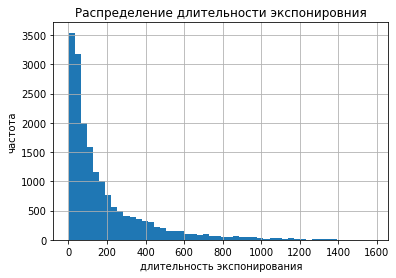

In [33]:
plt.xlabel("длительность экспонирования")
plt.ylabel('частота')
plt.title('Распределение длительности экспонировния')
data['days_exposition'].hist(bins=50)

Ровная, без всяких скачков получилась гистограмма. 

Итак, среднее время продажи 183 дня, медиана - 101 день. Разница существенная, поскольку мы имеем дело с сверхслучайной величиной или распределением с "толстым хвостом". 

In [34]:
data.query('days_exposition < 100').describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,8947.0,9.762714,5.729767,0.000000,6.000000,9.000000,14.000000,50.000000
last_price,8947.0,5242.926904,3426.242908,12.190000,3400.000000,4400.000000,6000.000000,39900.000000
total_area,8947.0,53.644875,22.264516,14.000000,38.350000,48.000000,62.600000,248.000000
rooms,8947.0,1.896166,0.918093,0.000000,1.000000,2.000000,3.000000,8.000000
ceiling_height,5296.0,2.688168,0.267612,1.000000,2.500000,2.600000,2.750000,10.000000
floors_total,8935.0,11.192054,6.630823,1.000000,5.000000,9.000000,16.000000,52.000000
living_area,8947.0,30.448477,14.968847,2.000000,18.000000,28.600000,38.000000,166.700000
floor,8947.0,6.195037,4.965955,1.000000,3.000000,5.000000,8.000000,33.000000
kitchen_area,8947.0,9.706155,4.428695,0.000000,7.000000,9.000000,11.000000,64.000000
balcony,8947.0,0.666257,0.971391,0.000000,0.000000,0.000000,1.000000,5.000000


В среднем за 100 дней и меньше расходятся двушки площадью чуть больше 50 $м^{2}$ с большой кухней по средней цене.
Быстрой продажой можно считать до 40 дней, половина квартир продается в пределах 100 дней, 75% - в промежутке  до 230 дней. 

Сухой остаток - если квартиру не купили в первые дни, ее шанс "застрять" в объявлении с каждым днем увеличивается. 

Редкие и выбивающиеся значения рассмотрены в п. 4.1.

### Факторы стоимости

Рассмотрим, какие факторы (площадь, число комнат, удалённость от центра, этаж и дата размещения объявления) оказывают наибольшее влияние на стоимость квартиры.

In [35]:
factors = ['total_area', 'rooms', 'cityCenters_nearest', 'floor_type', 'year', 'month', 'weekday', 'living_share', 'kitchen_share', 'last_price']

In [36]:
data[factors].corr()

,total_area,rooms,cityCenters_nearest,year,month,weekday,living_share,kitchen_share,last_price
total_area,1.000000,0.798162,-0.232920,-0.083213,0.004418,-0.010395,0.196843,-0.324954,0.784649
rooms,0.798162,1.000000,-0.169282,-0.049610,-0.001837,-0.002424,0.537116,-0.556581,0.504776
cityCenters_nearest,-0.232920,-0.169282,1.000000,0.020670,-0.015805,0.011415,-0.034572,0.018526,-0.340664
year,-0.083213,-0.049610,0.020670,1.000000,-0.256065,-0.005823,0.008346,0.013458,-0.037640
month,0.004418,-0.001837,-0.015805,-0.256065,1.000000,0.009819,-0.013568,0.007844,0.003800
weekday,-0.010395,-0.002424,0.011415,-0.005823,0.009819,1.000000,0.005970,-0.002282,-0.010604
living_share,0.196843,0.537116,-0.034572,0.008346,-0.013568,0.005970,1.000000,-0.724948,0.017385
kitchen_share,-0.324954,-0.556581,0.018526,0.013458,0.007844,-0.002282,-0.724948,1.000000,-0.100450
last_price,0.784649,0.504776,-0.340664,-0.037640,0.003800,-0.010604,0.017385,-0.100450,1.000000


По последней строчке вывод очевидный - для стоимости существует сильная положительная корреляция с общей площадью и количеством комнат и отрицательная корреляция - с удалением от центра.

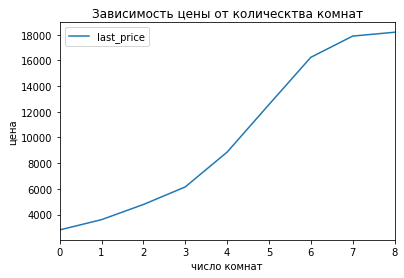

In [37]:

data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot()
plt.xlabel("число комнат")
plt.ylabel("цена")
plt.title("Зависимость цены от колическтва комнат") 
plt.show()

В ростом числа комнат растет медиана стоимости. 

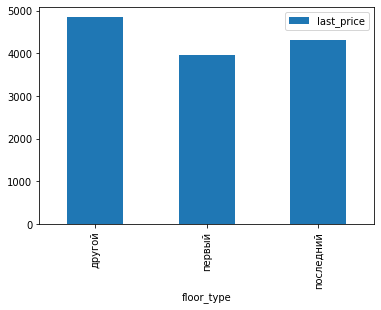

In [38]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar')

Очевидно, этаж оказывает влияние на стоимость квартиры - дешевле всего жилье на первом этаже, подороже - на последнем и самое дорогое - на других этажах.

Text(0, 0.5, 'цена')

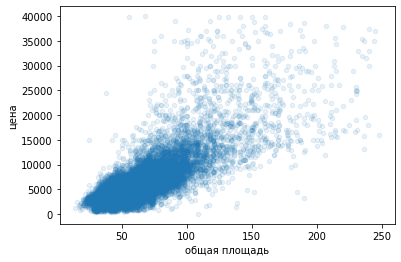

In [39]:

data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.xlabel("общая площадь")
plt.ylabel('цена')

В целом вывод такой - чем больше площадь, тем дороже.

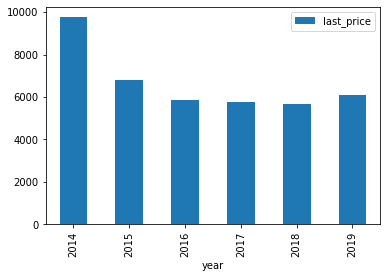

In [40]:
data.pivot_table(index='year', values='last_price').plot(kind='bar')
plt.show()

Text(0.5, 0, 'месяц')

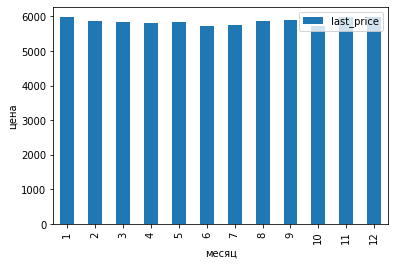

In [41]:
data.pivot_table(index='month', values='last_price').plot(kind='bar')
plt.ylabel('цена')
plt.xlabel('месяц')

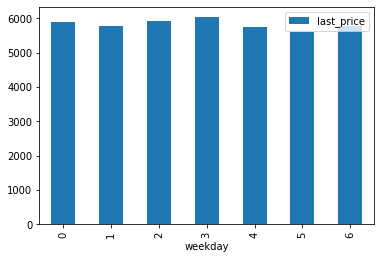

In [42]:
data.pivot_table(index='weekday', values='last_price').plot(kind='bar')

Из представленных таблиц следует, что только год публикации оказывает существенное влияние на стоимость. Скорее всего, это связано с колебанием курса валют и экономической ситуацией. Самое дорогое жилье было в 2014 году, затем  подешевело и только в 2019 начало набирать цену.

Text(0, 0.5, 'цена')

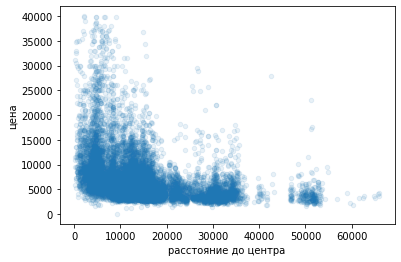

In [43]:

data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1)
plt.xlabel("расстояние до центра")
plt.ylabel('цена')

Самые дорогие квартиры - в центре до удаленности примерно 10 км, затем цены заметно снижаются. На расстоянии 50 км видно скопление недорогих предложений - скорее всего это крупный пригород. 

Питер - бывшая столица царской России. И исторический центр у него (Петроградка, Васька, Адмиралтейский, Центральный, часть Выборгского районов) заметно больше, чем у Москвы (Садовое кольцо). Поэтому до 10 км все можно считать центром, что и отражается на стоимости.

### Топ-10 по предложению

In [44]:
top_10_sup = data['locality_name'].value_counts().head(10)

In [45]:
top_10_sup

Санкт-Петербург      13944
посёлок Мурино         421
посёлок Шушары         396
Всеволожск             362
Пушкин                 335
Колпино                321
Гатчина                290
посёлок Парголово      290
деревня Кудрово        232
Выборг                 190
Name: locality_name, dtype: int64

In [46]:
top_10 = data.query('locality_name in @top_10_sup.index').pivot_table(index='locality_name', values='last_price', aggfunc=['count','mean'])
top_10.columns = ['count', 'mean']
top_10.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,13944,6991.899037
Пушкин,335,6317.953027
посёлок Парголово,290,4489.605031
деревня Кудрово,232,4397.358297
посёлок Шушары,396,4114.222977
Колпино,321,3862.771717
посёлок Мурино,421,3793.083430
Всеволожск,362,3789.911561
Гатчина,290,3493.687448


<div class="alert alert-block alert-warning">
<b>Remarks:</b> ✔нужно вывести сводную таблицу с средней ценой квадрата и числом объявлений

В топ-10 самые дорогие квартиры - в Питере, на 10 месте - Выборг. 


### Анализ недвижимости в центре

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


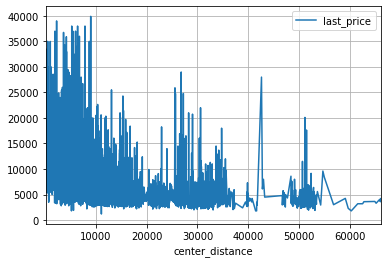

In [47]:
new_data = data.dropna(subset=['cityCenters_nearest'])
new_data['center_distance'] = new_data['cityCenters_nearest'].astype(int)
new_data.pivot_table(index='center_distance', values='last_price').plot( grid=True)

Точно, центр - в радиусе до 10 км, там график практически не меняется! Проанализируем особенности предложений в этой локации.

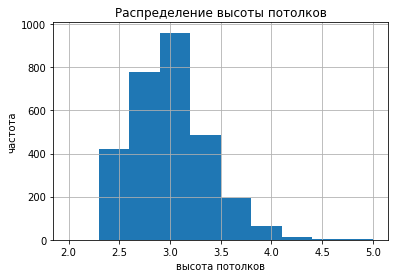

In [48]:
new_data = new_data.query('center_distance < 10000')
plt.xlabel("высота потолков")
plt.ylabel('частота')
plt.title('Распределение высоты потолков')
new_data['ceiling_height'].hist(range=(2, 5))

В центре города очень много жилья с высокими потолками - от 3 м. Это особенность старого Питера - в дореволюционных доходных домах квартиры с высокими потолками.

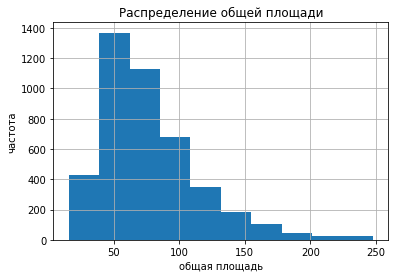

In [49]:
plt.xlabel("общая площадь")
plt.ylabel('частота')
plt.title('Распределение общей площади')
new_data['total_area'].hist()

На гистограмме видна еще одна особенность квартир в центре - большая площадь, в среднем 60 $м^{2}$, много вариантом от 100 $м^{2}$.

In [50]:
new_data.groupby('rooms')['rooms'].count()

rooms
0      21
1     831
2    1422
3    1327
4     480
5     164
6      57
7      31
8       6
Name: rooms, dtype: int64

По количеству комнат преобладают двушки и трешки, довольно часто всречаются четырех - пятикомнатные квартиры и даже больше.

In [51]:
new_data['last_price'].describe()

count     4339.000000
mean      9797.863039
std       6410.256018
min         12.190000
25%       5600.000000
50%       7930.000000
75%      11791.500000
max      39990.000000
Name: last_price, dtype: float64

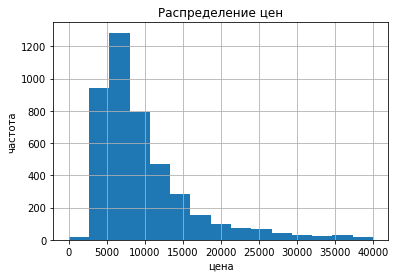

In [52]:
plt.xlabel("цена")
plt.ylabel('частота')
plt.title('Распределение цен')
new_data['last_price'].hist(bins=15)

Жилье в центре дорогое - средняя стоимость около 10 млн.

# 

## Общий вывод

Из представленных данных удалось выявить особенности рынка недвижимости Санкт-Петербурга. Установлено, что самый распространенный сегмент рынка - одно- и двух-комнатные квартиры. Очень сильный разброс цен, причем на цену влияет этаж - на первом и последнем она ниже.

Особо выделяется центральная часть города, в радиусе до 10 км. В этой области преобладают большие квартиры старого фонда и бизнес-класса, что наложило отпечаток на распределение высоты потолков, площади и количества комнат.



Самый распространенный сегмент рынка недвижимости - 1 и 2-х комн. квартиры. Средняя площадь составляет около 50 $м^{2}$, высота потолков 2,5-2,7 м. Объявления экспонируются долго, в среднем пол года. Менее чем за три  месяца продаются двушки плошадью примерно  50 $м^{2}$ с большой кухней. На стоимость недвижимости помимо площади оказывает влияние этаж - на первом и последнем цена до 10% ниже.  
    
Особо выделяется центр города - здесь квартиры больше, с высокими потолками. Среднее предложение - 2/3 комн. квартира площадью 60-80 $м^{2}$. Стоимость заметно выше, чем в среднем по городу, квартира обойдется в среднем в 10 млн. против 7 млн.
    
